In [6]:
## This notebook was used to construct artificial graphs. I would not use this nodebook, and if you do, do with great care!

import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

def graph_data(G, name, save = False, weight = None,pos=None, save_metrics=False):
    #graph = random_dict(G) ## Randomise node labels for a less linear experience and better usage with Attentionwalk
    directed = nx.is_directed(G)
    if not directed:
        print("undirected")
        #G = G.to_directed()
    else:
        print("directed")
    graph = G    
    
    if pos is None: # if no position is given by function call
        pos = nx.spring_layout(graph)
        
    #Make edges go both ways since the algorithms cannot handle 1 way data.  
    switch(graph,weight,name,save,pos,save_metrics) 

def switch(graph,weight,name,save,pos,save_metrics):  ## Switch between weighted and unweighted graphs  
    path = r'D:/Universiteit Utrecht/_Master/Scriptie/Project_Files/data/input/'     
    if weight == None:
        print("simple")    
        edge_list,fmt_1,fmt_2 = simple(graph,name)
        fig = draw(graph,name,pos)
    else: 
        print("weighted") 
        dictweights = dict(zip(graph.edges,weight))
        nx.set_edge_attributes(graph, values = dictweights, name = "weight")
        edge_list,fmt_1,fmt_2 = weighted(graph,name)
        fig = draw_weighted(graph,name,pos)        
    if save ==  True:            
        save_elist(edge_list,path,name,fmt_1,fmt_2)
        fig.savefig("D:/Universiteit Utrecht/_Master/Scriptie/examples/Experiment Patterns/Graphs/"+name+".png",dpi=600)
    if save_metrics == True:
        save_qmetrics(graph,path,name)
    plt.show(fig)
    
    
def simple(graph,name): # simple graph
        edge_list = list(graph.edges)
        edge_list.sort()
        fmt_1='%d,%d' # syntax for saving
        fmt_2='%d %d'
        return(edge_list,fmt_1,fmt_2)
        
        
def weighted(graph,name):  # weighted graph        
        labels = nx.get_edge_attributes(graph,'weight')        
        labels = list(labels.items())
        labels = [(a, b, c) for (a, b), c in labels] # Unpack tuple
        labels.sort() 
        fmt_1='%d,%d,%d' # syntax for saving
        fmt_2='%d %d %d'    
        return(labels,fmt_1,fmt_2)       
        

        
def draw(graph,name,pos):
    plt.close()
    #graph = graph.to_undirected()
    fig=plt.figure(figsize=(8,5), dpi= 600)       
    plt.title(name)    
    nx.draw(graph,pos, node_color = colors, with_labels=False)    
    return(fig)    
    
def draw_weighted(graph,name,pos):
    plt.close()
    fig=plt.figure(figsize=(8,5), dpi= 300)    
    plt.title(name)    
    nx.draw(graph,pos, with_labels=True)
    labels = nx.get_edge_attributes(graph,'weight')  
    nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels,font_size=10)    
    return(fig)   
    
    
    
        
def save_elist(edge_list,path,name,fmt_1,fmt_2): # save edgelist space delimited and comma delimited
        np.savetxt(path + "dataset_" + name + '.txt', edge_list, delimiter=",", fmt=fmt_1)         
        ## save data space delimited
        np.savetxt(path + "space_delimited/dataset_" + name + '.txt', edge_list, delimiter=",", fmt=fmt_2)
        print("dataset " + name + " saved to " + path)




def save_qmetrics(G,path,name): # save original metrics
    path = path + "metric/" + name
    length = list(nx.all_pairs_shortest_path_length(G,cutoff=3))  # Shortest path
    distance_list = list()
    for key,value in length:    
        for source,target in value.items():       
            temp = [key,source,target]
            distance_list.append(temp)

    df = pd.DataFrame(distance_list, columns = ["source","target","distance"])
    df.to_csv(path + '_khop_metric.txt', index=False, header=True, sep=',')

    df2 = pd.DataFrame(list(G.degree), columns = ["node","degree"]) # degrees of node
    df2.to_csv(path + '_degree_metric.txt', index=False, header=True, sep=',')

        
def random_dict(graph):  # randomize nodes  
    keys = list(graph.nodes)
    values = random.sample(range(len(keys)), len(keys))
    dictionary = dict(zip(keys, values))
    G = nx.relabel_nodes(graph,dictionary)    
    return G


  

In [35]:
colors = ["red","red","red","red","red","red","red","red","red","black","Gold","black",
          "red","red","red","red","red","red","red","red","red"]

undirected
simple
dataset Example embedd walk saved to D:/Universiteit Utrecht/_Master/Scriptie/Project_Files/data/input/


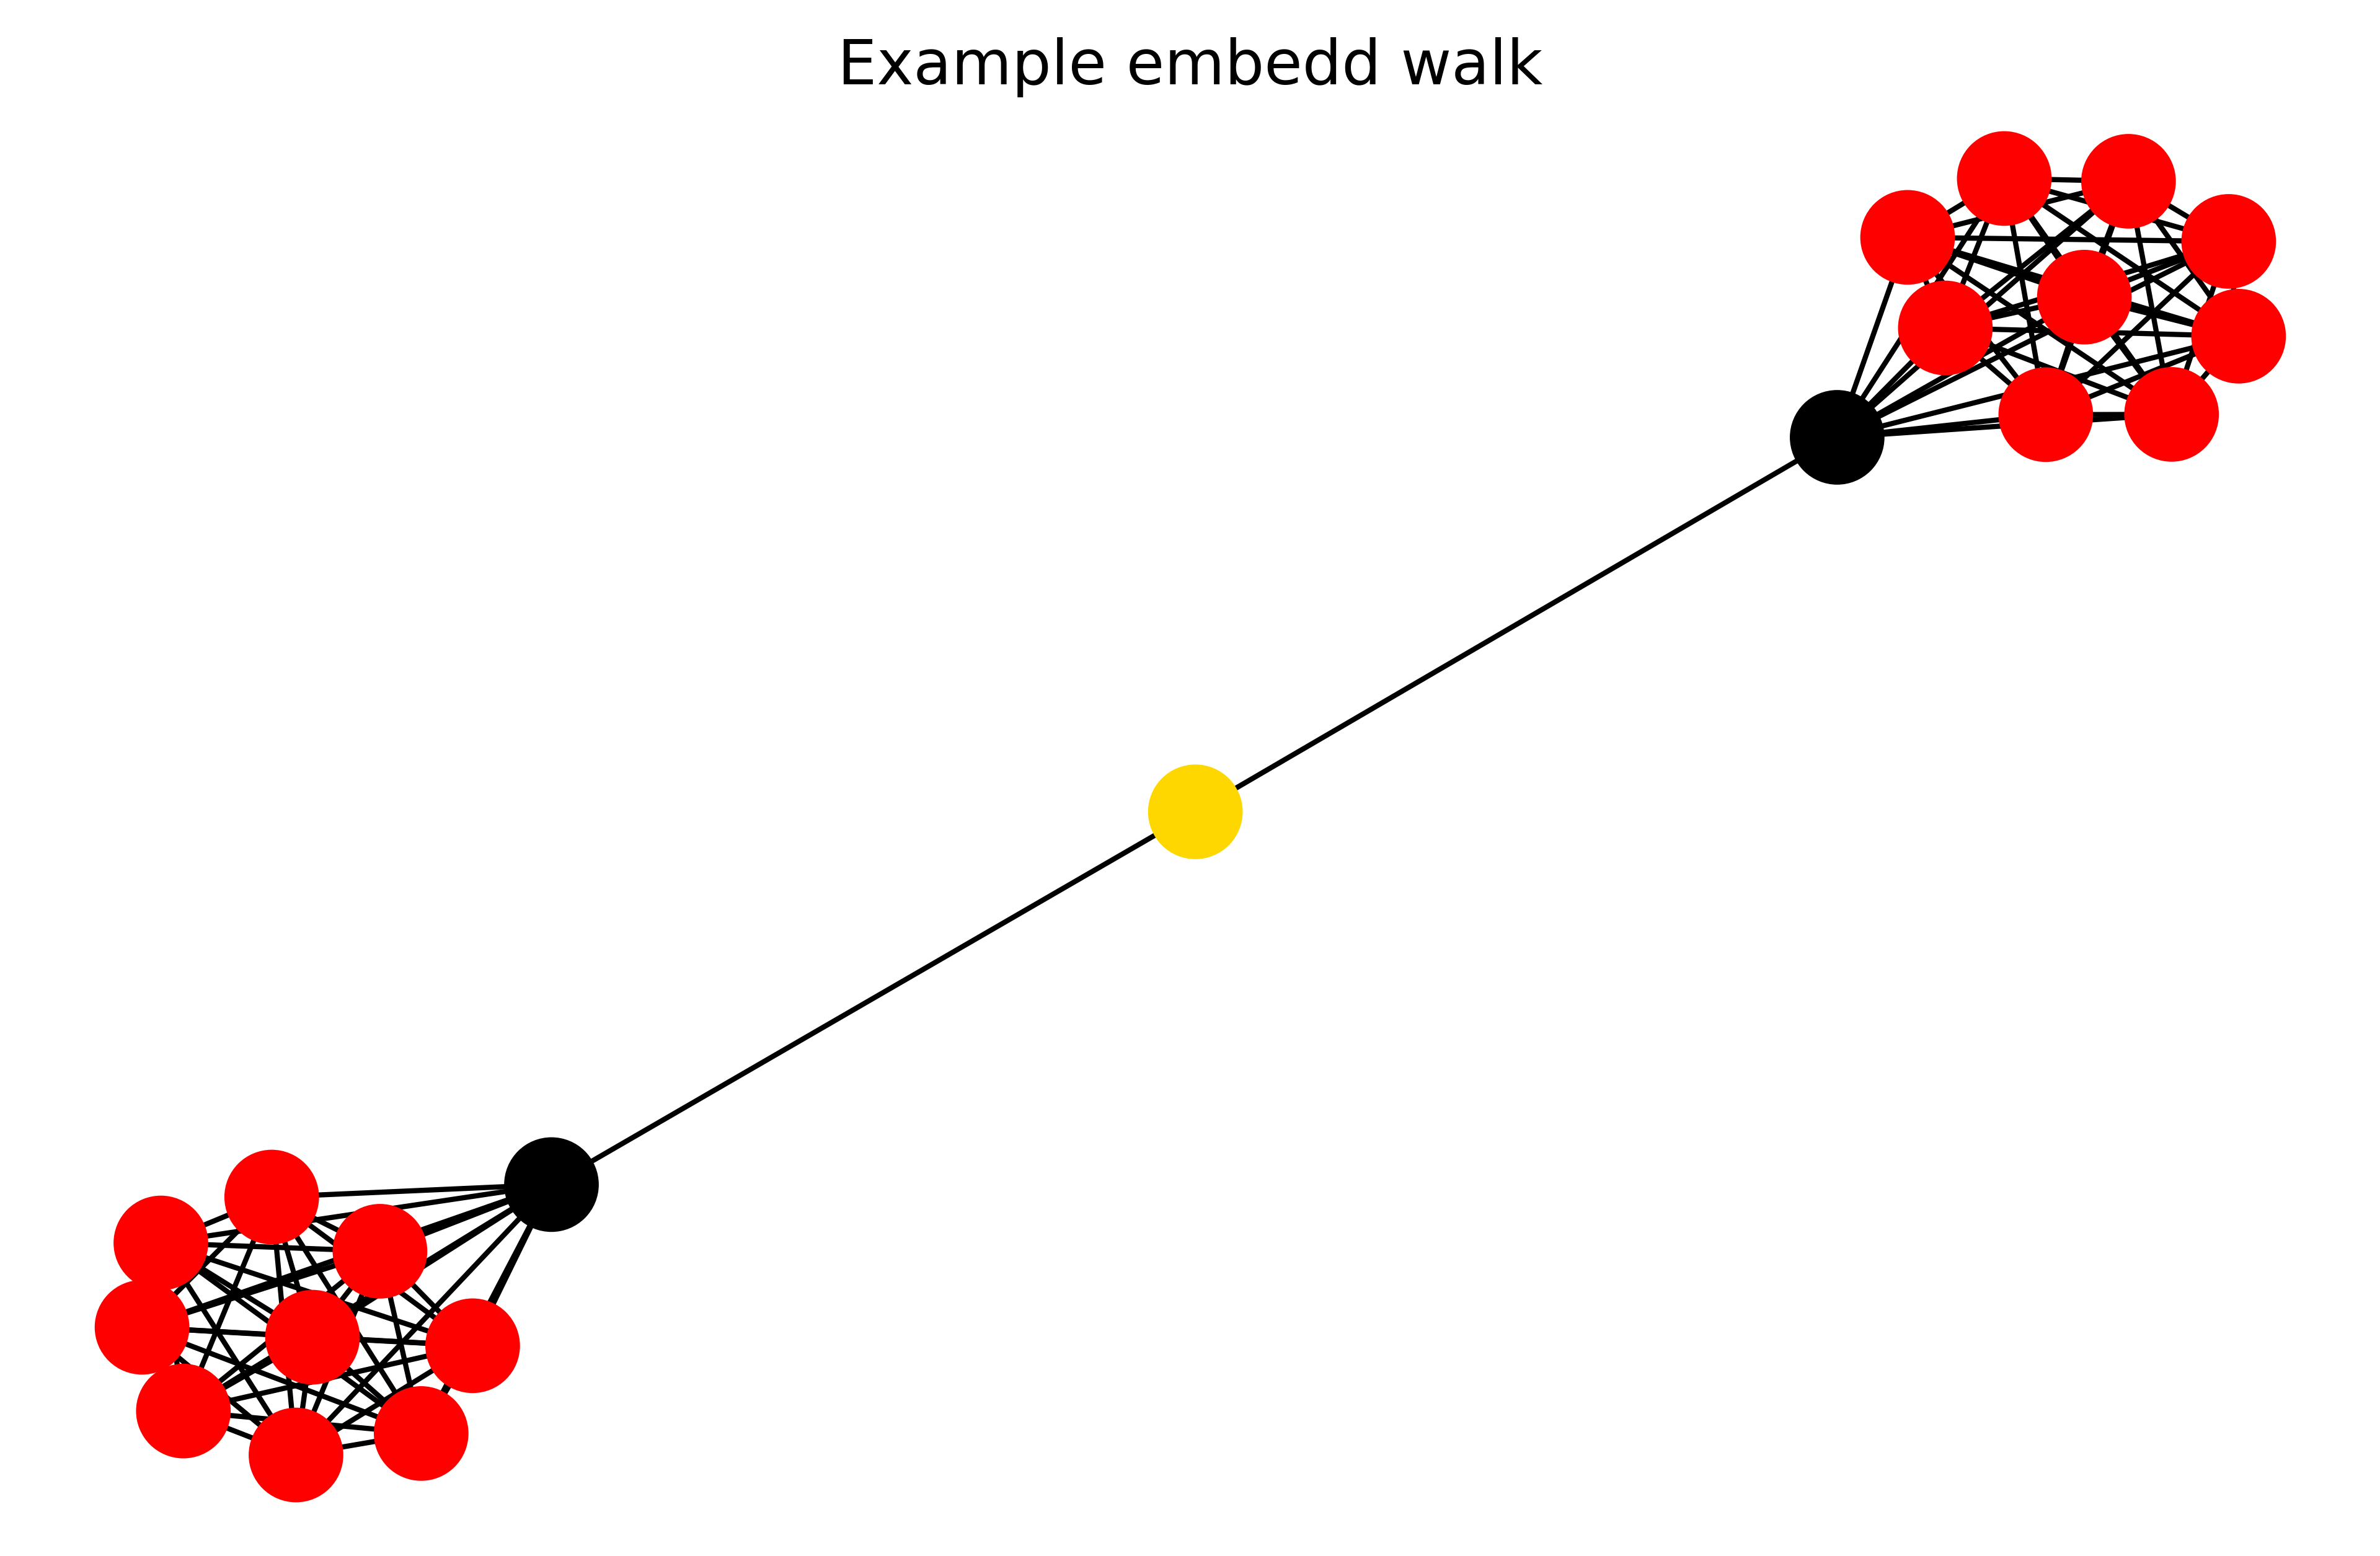

In [59]:
save_data = True
G = nx.barbell_graph(10,1)
pos = nx.spring_layout(G)
G = nx.Graph(G.edges)
graph_data(G, name="Example embedd walk", save = True,save_metrics=True, pos = pos)